# Importing necessary library

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

# 1. Data Loading and Preprocessing

In [5]:
# Load the data
df = pd.read_csv('parkinsons.csv')

# Display first five rows
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

***Check Data Shape***

In [4]:
print("\nData Shape", df.shape)


Data Shape (195, 24)


***Check Data info***

In [6]:
print("\nData Info")
df.info()



Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null   

***Finding Missing value***

In [7]:
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [8]:
# Separate features (X) and target variable (y)
X = df.drop(['name', 'status'], axis=1)
y = df['status']


# Normalize/Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Convert to Numpy arrays for tensorflow
X_scaled = np.asarray(X_scaled).astype('float32')
y = np.asarray(y).astype('float32')

# 2. Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Model Building (DNN Architecture)

In [11]:
model = Sequential([
    # Input Layer
    Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    # Hidden Layers
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    # Output Layer
    Dense(units=1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 4. Model Compilation

In [12]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]) #Add AUC to evaluate

# 5. Model Training

In [13]:
epochs = 100  # Number of epochs
batch_size = 32  # Batch size

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.1,
                    verbose=1) # Added validation split

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.5078 - auc: 0.4954 - loss: 1.1496 - val_accuracy: 0.8125 - val_auc: 0.6071 - val_loss: 0.5356
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5783 - auc: 0.6245 - loss: 0.7688 - val_accuracy: 0.7500 - val_auc: 0.6429 - val_loss: 0.5384
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6127 - auc: 0.6881 - loss: 0.8027 - val_accuracy: 0.8125 - val_auc: 0.6786 - val_loss: 0.5386
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6652 - auc: 0.8027 - loss: 0.6441 - val_accuracy: 0.7500 - val_auc: 0.6786 - val_loss: 0.5414
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7303 - auc: 0.7891 - loss: 0.6217 - val_accuracy: 0.7500 - val_auc: 0.6786 - val_loss: 0.5397
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7647 - auc: 0.8691 - loss: 0.4700 - val_accuracy: 0.7500 - val_auc: 0.6786 - val_loss: 0.5319
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step -

# 6. Model Evaluation

In [14]:
# Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = np.round(y_pred_prob)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


***Finding Metrics***

In [15]:
# Calculate accuracy, precision, recall, F1-score, and AUC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

mse_score = mse(y_test, y_pred)

In [17]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MSE: {mse_score:.4f}")

Accuracy: 0.8974
Precision: 0.9375
Recall: 0.9375
F1-score: 0.9375
AUC: 0.9821
MSE: 0.1026


In [18]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

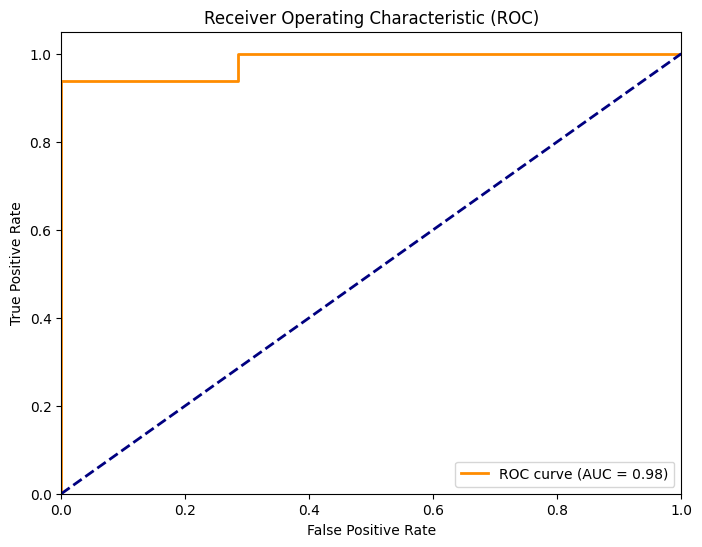

In [19]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 7. Plot Training Loss and Accuracy

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs_range = range(1, len(loss_values) + 1)

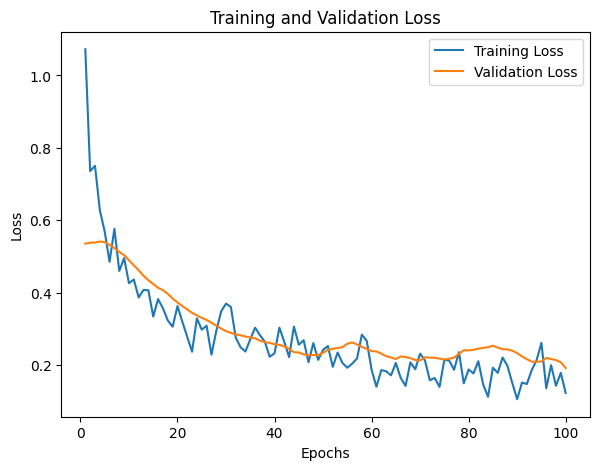

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_values, label='Training Loss')
plt.plot(epochs_range, val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

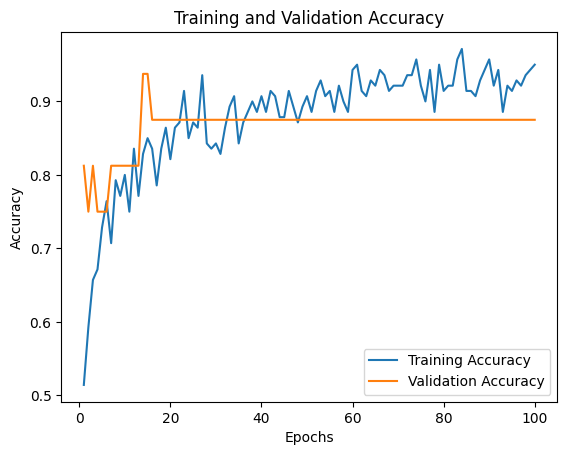

In [24]:
plt.subplot(1, 1, 1)
plt.plot(epochs_range, acc_values, label='Training Accuracy')
plt.plot(epochs_range, val_acc_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>